# Development notebook for testing the visualization module in QuTiP

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
from qutip import *

## Hinton

In [5]:
rho = rand_dm(5)

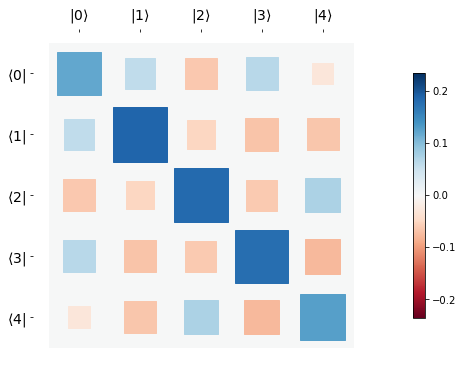

In [6]:
hinton(rho);

## Sphereplot

In [7]:
theta = np.linspace(0,     np.pi, 90)
phi   = np.linspace(0, 2 * np.pi, 60)

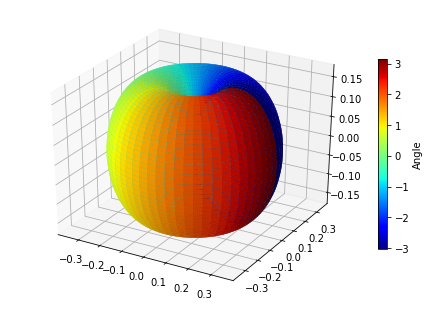

In [8]:
sphereplot(theta, phi, orbital(theta, phi, basis(3, 0)));

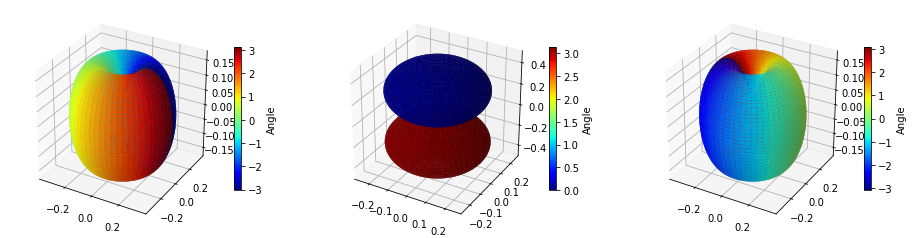

In [9]:
fig = plt.figure(figsize=(16,4))

ax = fig.add_subplot(1, 3, 1, projection='3d')
sphereplot(theta, phi, orbital(theta, phi, basis(3, 0)), fig, ax);

ax = fig.add_subplot(1, 3, 2, projection='3d')
sphereplot(theta, phi, orbital(theta, phi, basis(3, 1)), fig, ax);

ax = fig.add_subplot(1, 3, 3, projection='3d')
sphereplot(theta, phi, orbital(theta, phi, basis(3, 2)), fig, ax);

# Matrix histogram

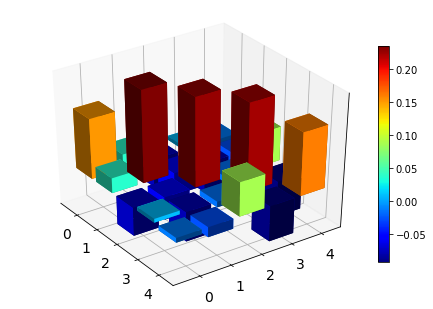

In [10]:
matrix_histogram(rho.full().real);

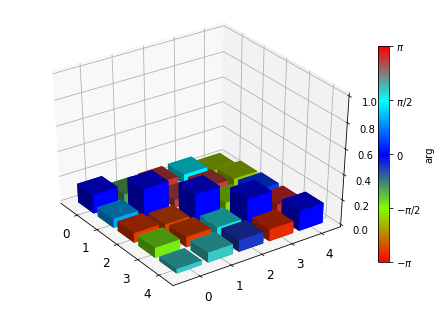

In [11]:
matrix_histogram_complex(rho.full());

# Plot energy levels

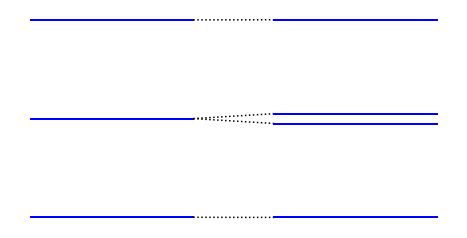

In [12]:
H0 = tensor(sigmaz(), identity(2)) + tensor(identity(2), sigmaz())
Hint = 0.1 * tensor(sigmax(), sigmax())

plot_energy_levels([H0, Hint], figsize=(8,4));

# Plot Fock distribution

In [13]:
rho = (coherent(15, 1.5) + coherent(15, -1.5)).unit()

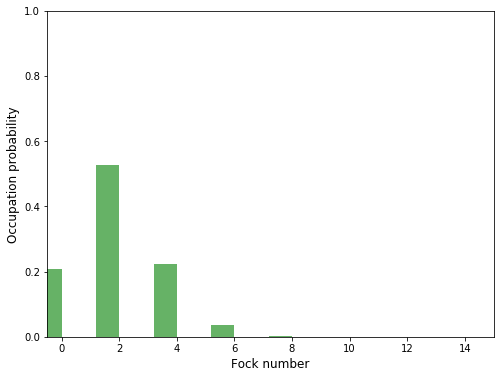

In [14]:
plot_fock_distribution(rho);

# Plot Wigner function and Fock distribution

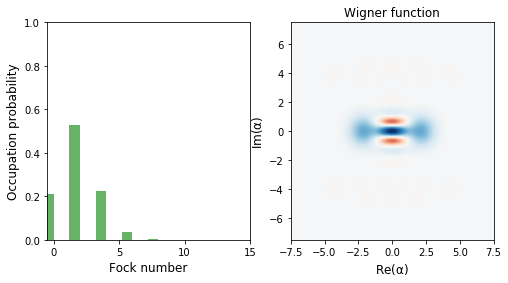

In [15]:
plot_wigner_fock_distribution(rho);

# Plot winger function

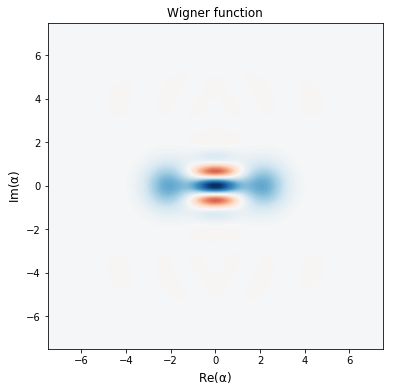

In [16]:
plot_wigner(rho, figsize=(6,6));

# Plot expectation values

In [17]:
H = sigmaz() + 0.3 * sigmay()
e_ops = [sigmax(), sigmay(), sigmaz()]
times = np.linspace(0, 10, 100)
psi0 = (basis(2, 0) + basis(2, 1)).unit()
result = mesolve(H, psi0, times, [], e_ops)

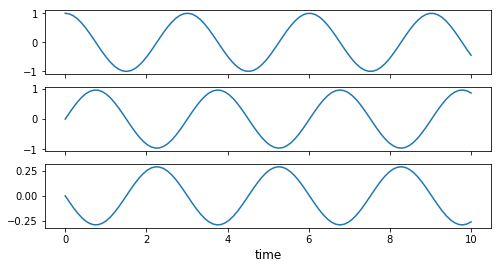

In [18]:
plot_expectation_values(result);

# Bloch sphere

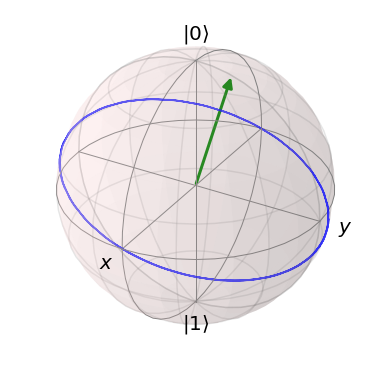

In [19]:
b = Bloch()
b.add_vectors(expect(H.unit(), e_ops))
b.add_points(result.expect, meth='l')
b.make_sphere()

# Plot spin Q-functions

In [20]:
j = 5
psi = spin_state(j, -j)
psi = spin_coherent(j, np.random.rand() * np.pi, np.random.rand() * 2 * np.pi)
rho = ket2dm(psi)

In [21]:
theta = np.linspace(0, np.pi, 50)
phi = np.linspace(0, 2 * np.pi, 50)

In [22]:
Q, THETA, PHI = spin_q_function(psi, theta, phi)

## 2D

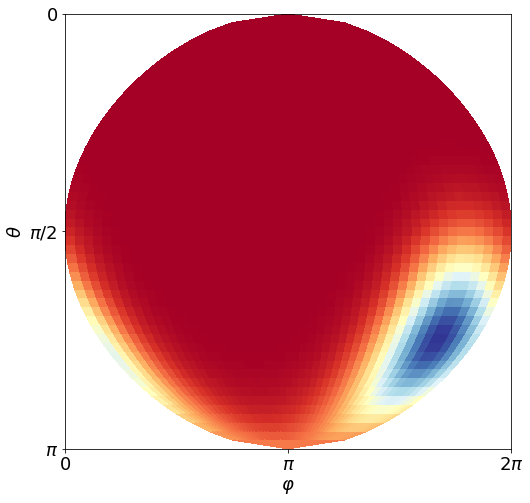

In [23]:
plot_spin_distribution_2d(Q, THETA, PHI);

## 3D

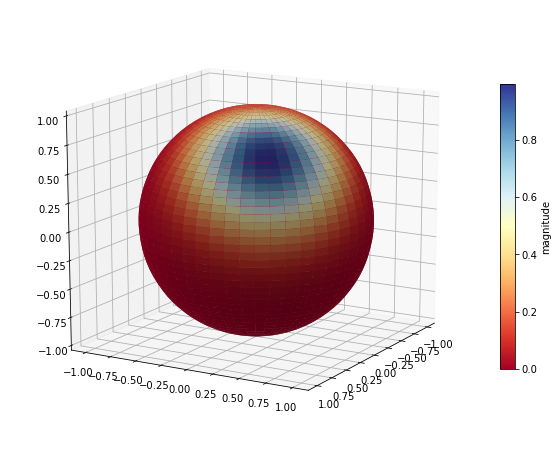

In [24]:
fig, ax = plot_spin_distribution_3d(Q, THETA, PHI);

ax.view_init(15, 30)

## Combined 2D and 3D

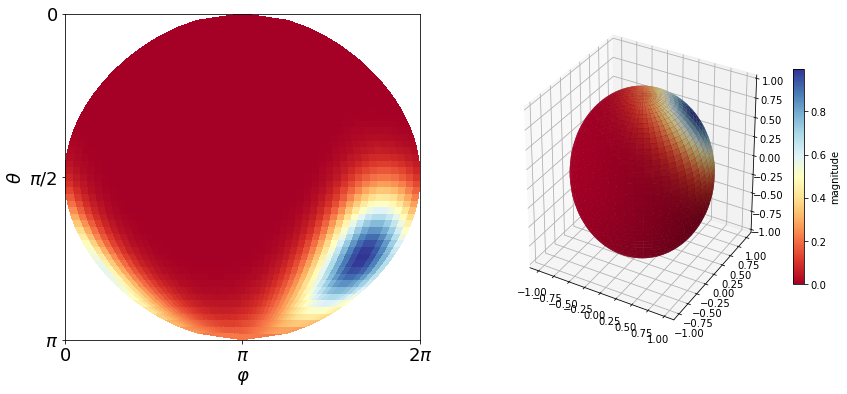

In [25]:
fig = plt.figure(figsize=(14,6))

ax = fig.add_subplot(1, 2, 1)
f1, a1 = plot_spin_distribution_2d(Q, THETA, PHI, fig=fig, ax=ax)

ax = fig.add_subplot(1, 2, 2, projection='3d')
f2, a2 = plot_spin_distribution_3d(Q, THETA, PHI, fig=fig, ax=ax)

# Plot spin-Wigner functions

In [26]:
W, THETA, PHI = spin_wigner(psi, theta, phi)

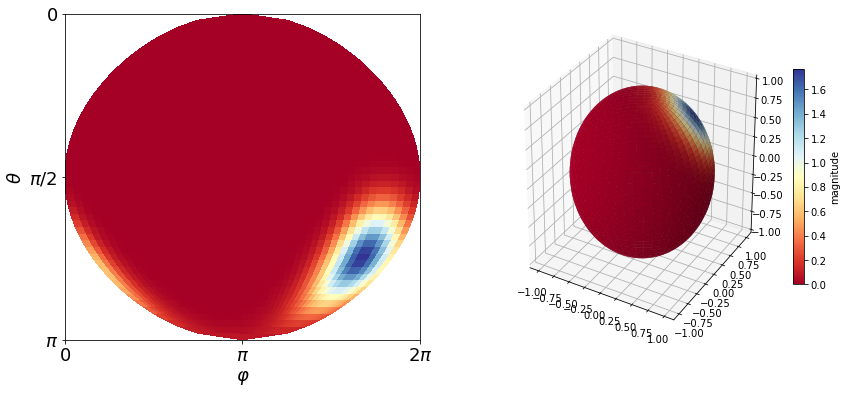

In [27]:
fig = plt.figure(figsize=(14,6))

ax = fig.add_subplot(1, 2, 1)
f1, a1 = plot_spin_distribution_2d(W.real, THETA, PHI, fig=fig, ax=ax)

ax = fig.add_subplot(1, 2, 2, projection='3d')
f2, a2 = plot_spin_distribution_3d(W.real, THETA, PHI, fig=fig, ax=ax)

# Versions

In [28]:
from qutip.ipynbtools import version_table

version_table()

Software,Version
QuTiP,4.3.0.dev0+6e5b1d43
Numpy,1.13.1
SciPy,0.19.1
matplotlib,2.0.2
Cython,0.25.2
Number of CPUs,2
BLAS Info,INTEL MKL
IPython,6.1.0
Python,"3.6.2 |Anaconda custom (x86_64)| (default, Jul 20 2017, 13:14:59) [GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]"
OS,posix [darwin]
